In [1]:
import pandas as pd

In [2]:
X = pd.read_csv('train_values.csv', index_col='row_id')
y = pd.read_csv('train_labels.csv', index_col='row_id')

In [3]:
X.head()

,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr
row_id,,,,,,,,,,,,,,,,,,,,,
0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,...,0.131,0.089,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,a
1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,...,0.090,0.082,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,a
4,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,0.115,...,0.084,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,b
5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,0.164,...,0.104,0.058,NaN,0.238,13.0,NaN,NaN,1810.0,6630.0,b
6,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,0.171,...,0.137,0.070,0.194,0.290,9.0,NaN,29.39,3489.0,2590.0,a


### Basic Statistics

In [4]:
print('Minimum mortality rate:', y.heart_disease_mortality_per_100k.min())
print('Maxmum mortality rate:', y.heart_disease_mortality_per_100k.max())
print('Mean mortality rate:', y.heart_disease_mortality_per_100k.mean())
print('Median mortality rate:', y.heart_disease_mortality_per_100k.median())
print('Standard deviation of mortality rate', y.heart_disease_mortality_per_100k.std())

Minimum mortality rate: 109
Maxmum mortality rate: 512
Mean mortality rate: 279.3692933083177
Median mortality rate: 275.0
Standard deviation of mortality rate 58.95333788457741


### Distribution of mortality rate

NameError: name 'plt' is not defined

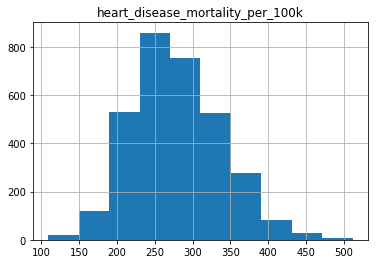

In [15]:
hist = y.hist()
hist
plt.show()

### Metro vs mortality rate

In [6]:
df_train = pd.merge(X, y, left_index=True, right_index=True)

In [7]:
df_train.area__rucc.unique()

array(['Metro - Counties in metro areas of fewer than 250,000 population',
       'Metro - Counties in metro areas of 1 million population or more',
       'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area',
       'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area',
       'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area',
       'Metro - Counties in metro areas of 250,000 to 1 million population',
       'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area',
       'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area',
       'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area'],
      dtype=object)

In [8]:
df_train['Metro?'] = ''
df_train.loc[df_train['area__rucc'].str[:5] == 'Metro', 'Metro?'] = 'Metro'
df_train.loc[df_train['area__rucc'].str[:8] == 'Nonmetro', 'Metro?'] = 'Nonmetro'

In [9]:
df_train.groupby(df_train['Metro?'])[['heart_disease_mortality_per_100k']].median()

,heart_disease_mortality_per_100k
Metro?,
Metro,261
Nonmetro,282


### Birth rate vs mortality rate

In [10]:
df_train['demo__birth_rate_per_1k'].corr(df_train['heart_disease_mortality_per_100k'])

0.14217629783295996

### Tobacco and alcohol use vs mortality rate

In [11]:
df_train['health__pct_adult_smoking'].corr(df_train['heart_disease_mortality_per_100k'])

0.49706330920019287

In [12]:
df_train['health__pct_excessive_drinking'].corr(df_train['heart_disease_mortality_per_100k'])

-0.3821721055119925

### Older people and metro/non-metro vs mortality rate

In [13]:
df_train['large_elderly_pop'] = ''
df_train.loc[df_train['demo__pct_aged_65_years_and_older'] > 0.2, 'large_elderly_pop'] = 'Y'
df_train.loc[df_train['demo__pct_aged_65_years_and_older'] <= 0.2, 'large_elderly_pop'] = 'N'

In [14]:
df_train.groupby(['Metro?','large_elderly_pop'])['heart_disease_mortality_per_100k'].median()

Metro?    large_elderly_pop
Metro     N                    263.0
          Y                    250.0
Nonmetro                       187.5
          N                    294.0
          Y                    254.0
Name: heart_disease_mortality_per_100k, dtype: float64